In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [5]:
 #importing the dataset

In [6]:
df = pd.read_csv("Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [7]:
# checking the shape of the dataset
df.shape

(690, 16)

In [8]:
df.describe().T #descriptive statistics

,count,mean,std,min,25%,50%,75%,max
CustomerID,690.0,1.569047e+07,71506.473912,15565714.00,1.563169e+07,1.569016e+07,1.575190e+07,15815443.00
A1,690.0,6.782609e-01,0.467482,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A2,690.0,3.156820e+01,11.853273,13.75,2.267000e+01,2.862500e+01,3.770750e+01,80.25
A3,690.0,4.758725e+00,4.978163,0.00,1.000000e+00,2.750000e+00,7.207500e+00,28.00
A4,690.0,1.766667e+00,0.430063,1.00,2.000000e+00,2.000000e+00,2.000000e+00,3.00
A5,690.0,7.372464e+00,3.683265,1.00,4.000000e+00,8.000000e+00,1.000000e+01,14.00
A6,690.0,4.692754e+00,1.992316,1.00,4.000000e+00,4.000000e+00,5.000000e+00,9.00
A7,690.0,2.223406e+00,3.346513,0.00,1.650000e-01,1.000000e+00,2.625000e+00,28.50
A8,690.0,5.231884e-01,0.499824,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A9,690.0,4.275362e-01,0.495080,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00


In [9]:
df.info() #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [10]:
df.isnull().sum() #checking for missing values

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [11]:
df.drop(["CustomerID"],axis=1,inplace=True) #dropping the CustomerID column

In [12]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [13]:
df.columns # column names

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'Class'],
      dtype='object')

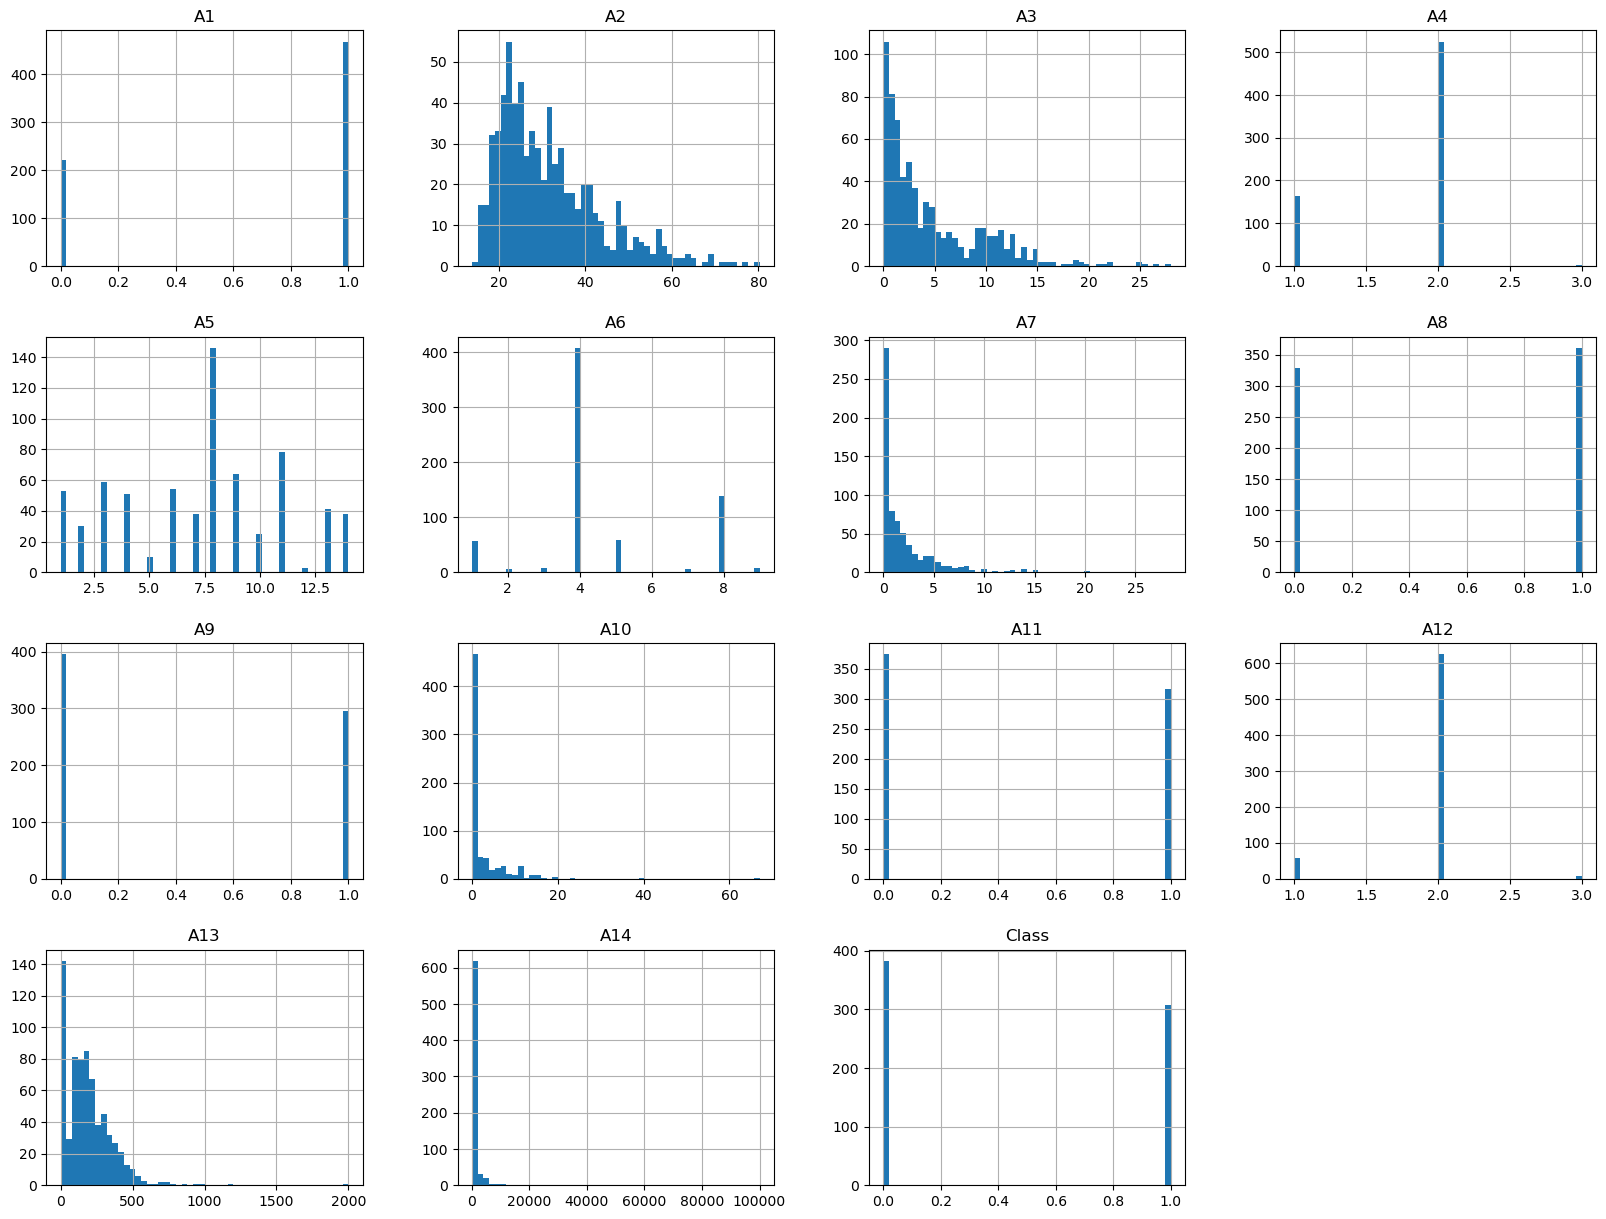

In [14]:
df.hist(bins=50,figsize=(20,15)); #histogram

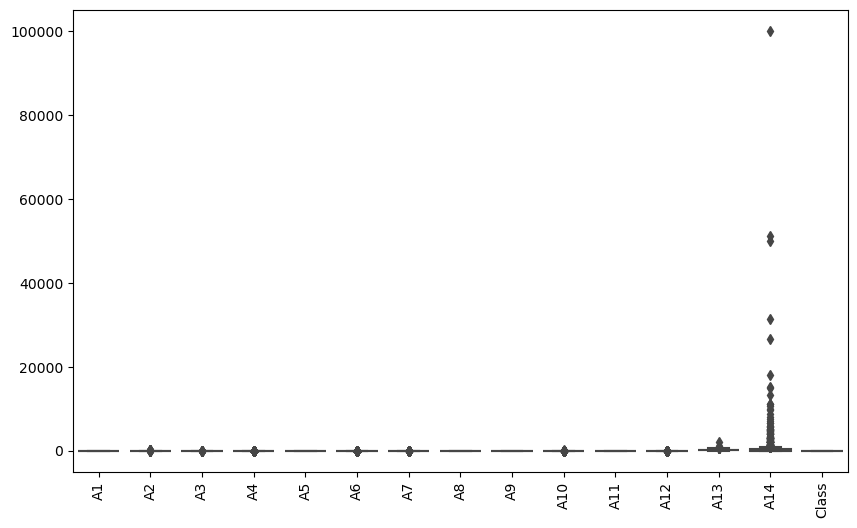

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()  #boxplot

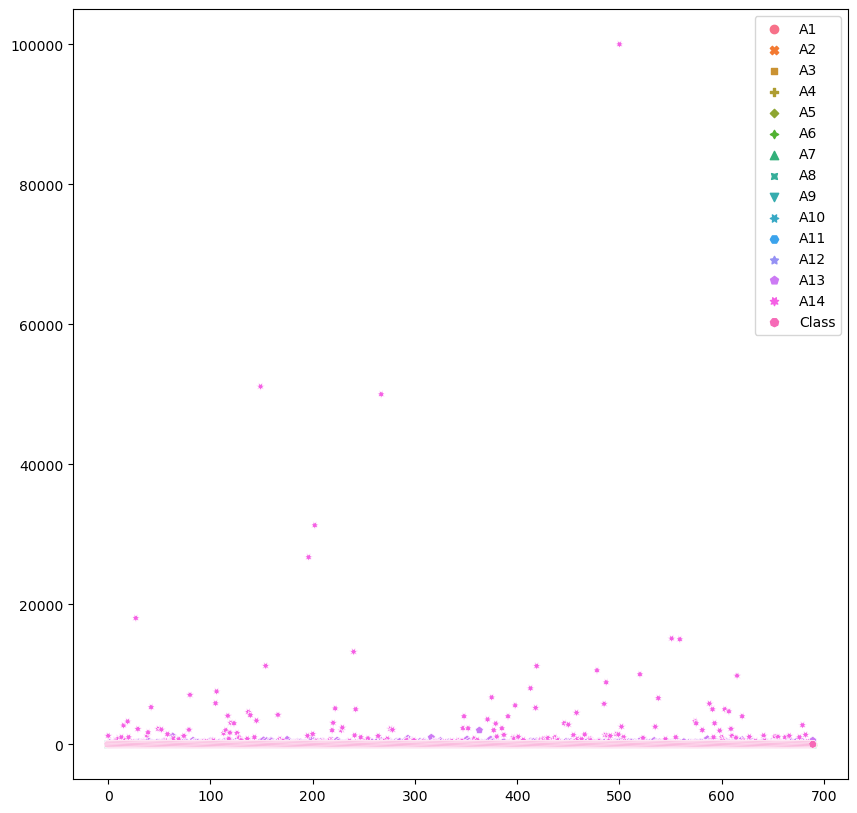

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df)
plt.show() #scatterplot

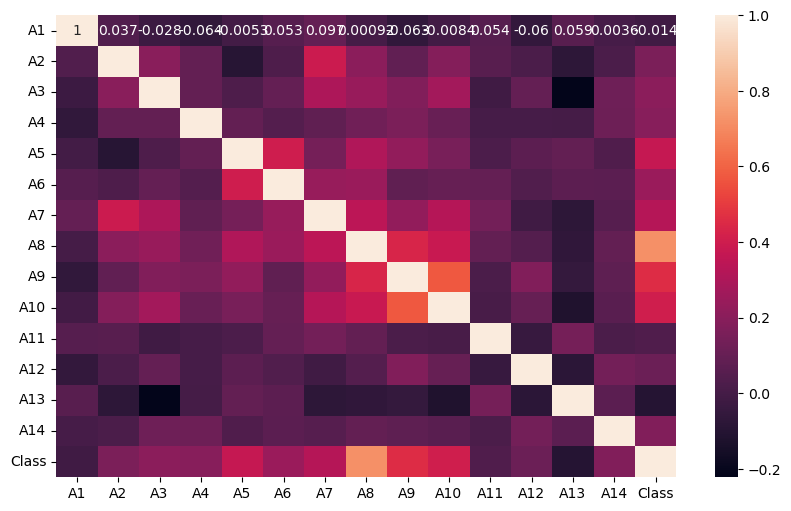

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show() #heatmap

<Axes: ylabel='Class'>

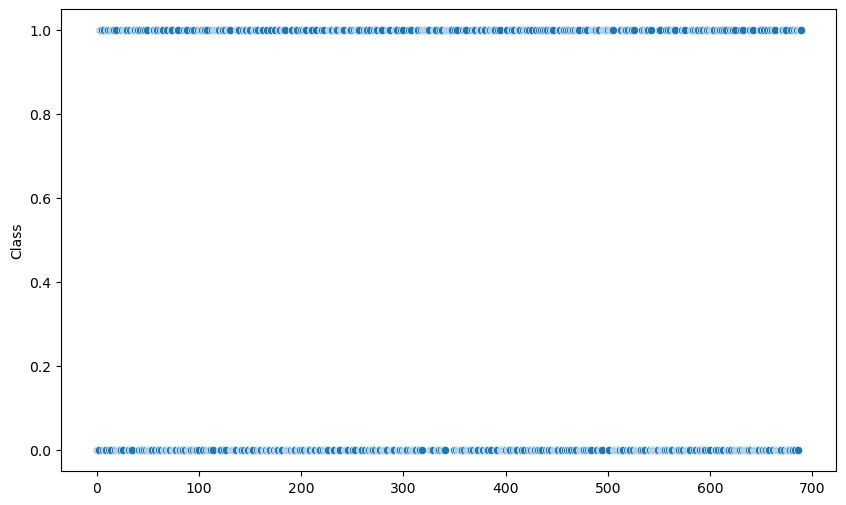

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot((df["Class"])) #distribution of the target variable

In [19]:
y = df["Class"]
X= df.drop(["Class"],axis=1) #dropping the target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the dataset

In [21]:
def performance(model, X_test, y_test): #function to check the performance of the model
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred)) 

# Decision Tree

In [22]:
# model training
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
performance(decision_tree, X_test, y_test)



              precision    recall  f1-score   support

           0       0.88      0.89      0.88        87
           1       0.80      0.78      0.79        51

    accuracy                           0.85       138
   macro avg       0.84      0.83      0.84       138
weighted avg       0.85      0.85      0.85       138

[[77 10]
 [11 40]]
0.8478260869565217


# Random Forest

In [23]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
performance(random_forest, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        87
           1       0.86      0.82      0.84        51

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

[[80  7]
 [ 9 42]]
0.8840579710144928


# Logistic Regression

In [24]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
performance(logistic_regression, X_test, y_test)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        87
           1       0.78      0.69      0.73        51

    accuracy                           0.81       138
   macro avg       0.80      0.79      0.79       138
weighted avg       0.81      0.81      0.81       138

[[77 10]
 [16 35]]
0.8115942028985508


# gradient boosting

In [29]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
performance(gradient_boosting, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        87
           1       0.85      0.80      0.83        51

    accuracy                           0.88       138
   macro avg       0.87      0.86      0.87       138
weighted avg       0.88      0.88      0.88       138

[[80  7]
 [10 41]]
0.8768115942028986


# ada boosting

In [39]:
# model training
ada_boosting = AdaBoostClassifier()
ada_boosting.fit(X_train, y_train)
performance(ada_boosting, X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        87
           1       0.83      0.78      0.81        51

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138

[[79  8]
 [11 40]]
0.8623188405797102


# K-Nearest Neighbors

In [38]:
# model training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
performance(knn, X_test, y_test)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        87
           1       0.60      0.61      0.60        51

    accuracy                           0.70       138
   macro avg       0.68      0.68      0.68       138
weighted avg       0.70      0.70      0.70       138

[[66 21]
 [20 31]]
0.7028985507246377


# Svm

In [37]:
# model training
svm = SVC()
svm.fit(X_train, y_train)
performance(svm, X_test, y_test)

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        87
           1       0.74      0.27      0.40        51

    accuracy                           0.70       138
   macro avg       0.71      0.61      0.60       138
weighted avg       0.71      0.70      0.65       138

[[82  5]
 [37 14]]
0.6956521739130435


# Naive Bayes

In [36]:
# model training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
performance(naive_bayes, X_test, y_test)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        87
           1       0.84      0.63      0.72        51

    accuracy                           0.82       138
   macro avg       0.83      0.78      0.79       138
weighted avg       0.82      0.82      0.81       138

[[81  6]
 [19 32]]
0.8188405797101449


# Mlp model

In [42]:
# model training
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
performance(MLP, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        87
           1       0.88      0.73      0.80        51

    accuracy                           0.86       138
   macro avg       0.87      0.83      0.85       138
weighted avg       0.86      0.86      0.86       138

[[82  5]
 [14 37]]
0.8623188405797102


# model testing

In [43]:
print("Random Forest Test Accuracy {:.2f}%".format(random_forest.score(X_test, y_test) * 100))
print("Decision Tree Test Accuracy {:.2f}%".format(decision_tree.score(X_test, y_test) * 100))
print("Logistic Regression Test Accuracy {:.2f}%".format(logistic_regression.score(X_test, y_test) * 100))
print("Gradient Boosting Test Accuracy {:.2f}%".format(gradient_boosting.score(X_test, y_test) * 100))
print("Ada Boosting Test Accuracy {:.2f}%".format(ada_boosting.score(X_test, y_test) * 100))
print("KNN Test Accuracy {:.2f}%".format(knn.score(X_test, y_test) * 100))
print("SVM Test Accuracy {:.2f}%".format(svm.score(X_test, y_test) * 100))
print("Naive Bayes Test Accuracy {:.2f}%".format(naive_bayes.score(X_test, y_test) * 100))
print("MLP Test Accuracy {:.2f}%".format(MLP.score(X_test, y_test) * 100))

Random Forest Test Accuracy 88.41%
Decision Tree Test Accuracy 84.78%
Logistic Regression Test Accuracy 81.16%
Gradient Boosting Test Accuracy 87.68%
Ada Boosting Test Accuracy 86.23%
KNN Test Accuracy 70.29%
SVM Test Accuracy 69.57%
Naive Bayes Test Accuracy 81.88%
MLP Test Accuracy 86.23%


# Model Selection

In [52]:
models = [random_forest, decision_tree, logistic_regression, gradient_boosting, ada_boosting, knn, svm, naive_bayes, MLP]
models.sort(key=lambda x: x.score(X_test, y_test), reverse=True)

for model in models:
    i = models.index(model)
    print(model)
    print(i + 1., "Test Accuracy {:.2f}%".format(models[i].score(X_test, y_test) * 100))

RandomForestClassifier()
1.0 Test Accuracy 88.41%
GradientBoostingClassifier()
2.0 Test Accuracy 87.68%
AdaBoostClassifier()
3.0 Test Accuracy 86.23%
MLPClassifier()
4.0 Test Accuracy 86.23%
DecisionTreeClassifier()
5.0 Test Accuracy 84.78%
GaussianNB()
6.0 Test Accuracy 81.88%
LogisticRegression()
7.0 Test Accuracy 81.16%
KNeighborsClassifier()
8.0 Test Accuracy 70.29%
SVC()
9.0 Test Accuracy 69.57%
